# Import Libraries

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file and read the data

In [102]:
data = pd.read_csv("spam.csv", encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Perform EDA

- Understand the Dataset: Start by gaining a high-level understanding of the dataset. Look at the dataset's structure, the number of rows and columns, and the data types of each column. This step helps you get familiar with the data you'll be working with.

- Handle Missing Data: Identify missing values in the dataset and decide how to handle them. Depending on the amount and nature of missing data, you can choose to drop rows or columns with missing values, impute missing values with suitable methods, or keep missing values as a separate category if applicable.

- Deal with Duplicates: Check for duplicate records in the dataset. If duplicates exist, decide whether to remove them or handle them based on the specific analysis requirements.

- Examine Descriptive Statistics: Calculate descriptive statistics for numerical variables such as mean, median, standard deviation, minimum, and maximum values. This step provides a summary of the central tendency and spread of the data.

- Visualize the Data: Use various plots and charts to visualize the data and identify patterns, trends, or outliers. Some commonly used visualizations include histograms, scatter plots, bar charts, box plots, and correlation matrices.

In [103]:
# check for the column names
columns = list(data.columns)
columns

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [104]:
#Renaming the columns for ease of using them later
data.rename(columns={'v1':'Spam/Ham','v2':'Email Text'},inplace=True)

In [105]:
#getting only the columns to be used
data = data[['Spam/Ham', 'Email Text']]

In [106]:
# check rows and columns
data.shape

(5572, 2)

In [107]:
# check for the null values
data.isnull().sum()

Spam/Ham      0
Email Text    0
dtype: int64

In [108]:
# the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Spam/Ham    5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [109]:
# checking for the column names
data.columns

Index(['Spam/Ham', 'Email Text'], dtype='object')

In [110]:
data.duplicated().sum()

403

In [111]:
# as we can see there are two Target named columns lets remove one
data = data.drop_duplicates(subset=['Email Text'], keep='first')

In [112]:
data.duplicated().sum()

0

In [113]:
data.shape

(5169, 2)

In [114]:
from wordcloud import WordCloud

# Step 1: Class Distribution
class_counts = data['Spam/Ham'].value_counts()
print("Class Distribution:")
print(class_counts)


Class Distribution:
ham     4516
spam     653
Name: Spam/Ham, dtype: int64


In [115]:
# Step 2: Text Analysis
data['Email Length'] = data['Email Text'].apply(lambda x: len(x))
email_lengths = data.groupby('Spam/Ham')['Email Length'].describe()
print("\nEmail Length Statistics:")
email_lengths


Email Length Statistics:


,count,mean,std,min,25%,50%,75%,max
Spam/Ham,,,,,,,,
ham,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
spam,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0


In [116]:
# Step 3: Word Frequency Analysis
spam_emails = data[data['Spam/Ham'] == 'spam']['Email Text']
non_spam_emails = data[data['Spam/Ham'] == 'ham']['Email Text']

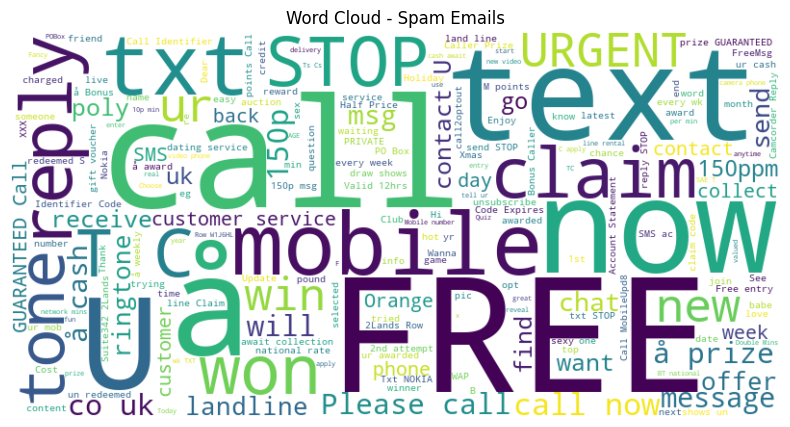

In [117]:
# Word Cloud for Spam Emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Emails')
plt.axis('off')
plt.show()

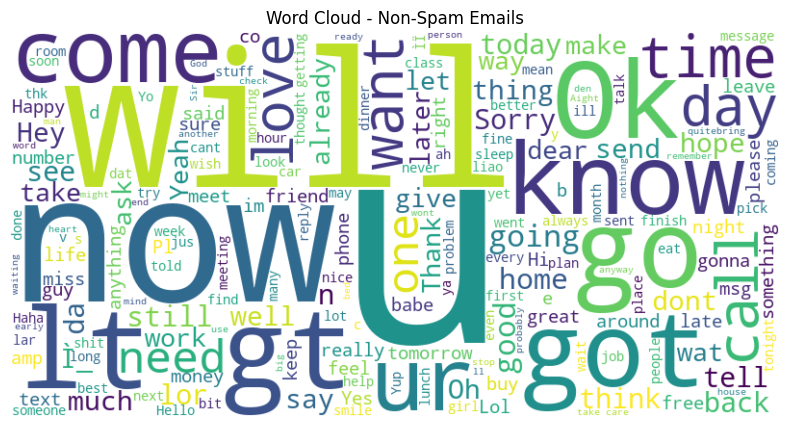

In [118]:
# Word Cloud for Non-Spam Emails
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_spam_emails))
plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Non-Spam Emails')
plt.axis('off')
plt.show()

# Visualizations

<Figure size 1000x500 with 0 Axes>

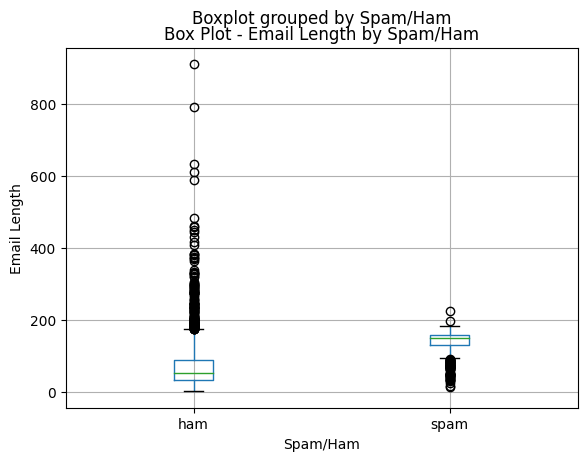

In [119]:
# Boxplot
plt.figure(figsize=(10, 5))
data.boxplot(column='Email Length', by='Spam/Ham')
plt.title('Box Plot - Email Length by Spam/Ham')
plt.ylabel('Email Length')
plt.show()

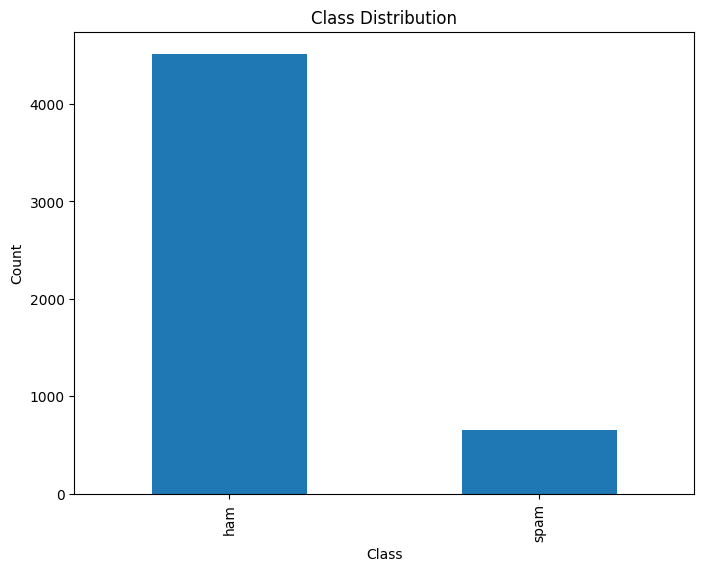

In [120]:
# Bar plot
plt.figure(figsize=(8, 6))
data['Spam/Ham'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

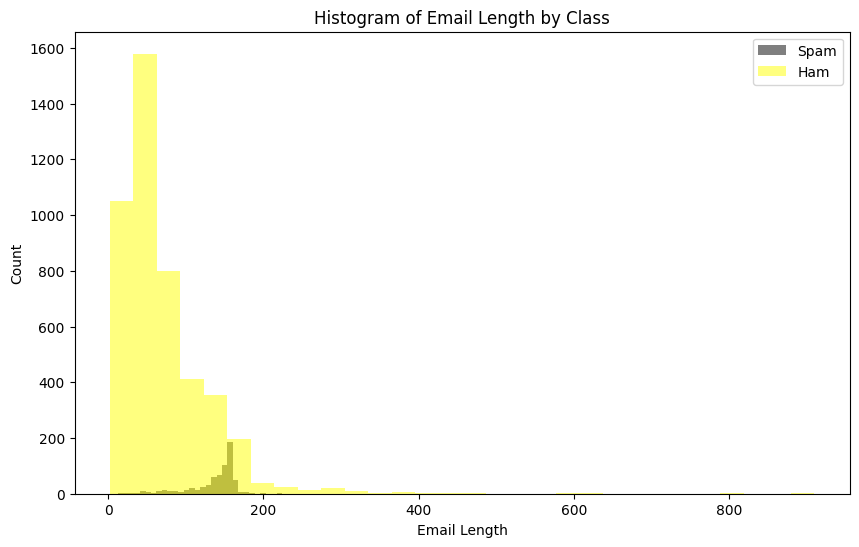

In [121]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[data['Spam/Ham'] == 'spam']['Email Length'], bins=30, alpha=0.5, label='Spam', color='black')
plt.hist(data[data['Spam/Ham'] == 'ham']['Email Length'], bins=30, alpha=0.5, label='Ham', color='yellow')
plt.title('Histogram of Email Length by Class')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.legend()
plt.show()

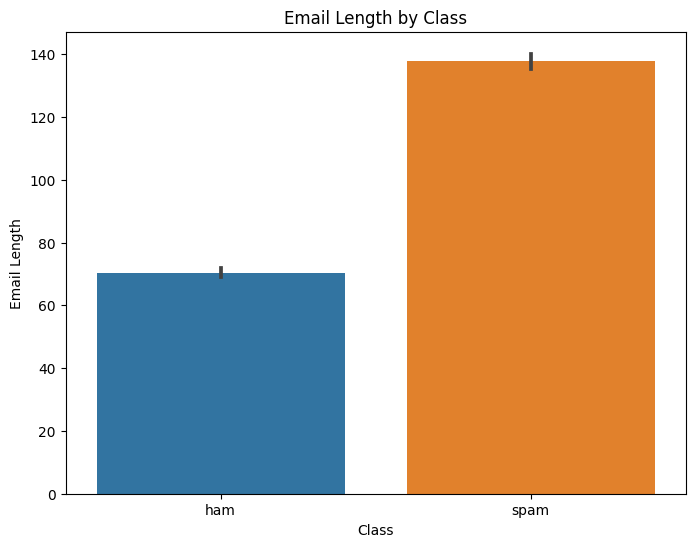

In [122]:
# Bar plot
import seaborn as sns

# Calculate email lengths
data['Email Length'] = data['Email Text'].str.len()

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Spam/Ham', y='Email Length')
plt.title('Email Length by Class')
plt.xlabel('Class')
plt.ylabel('Email Length')
plt.show()

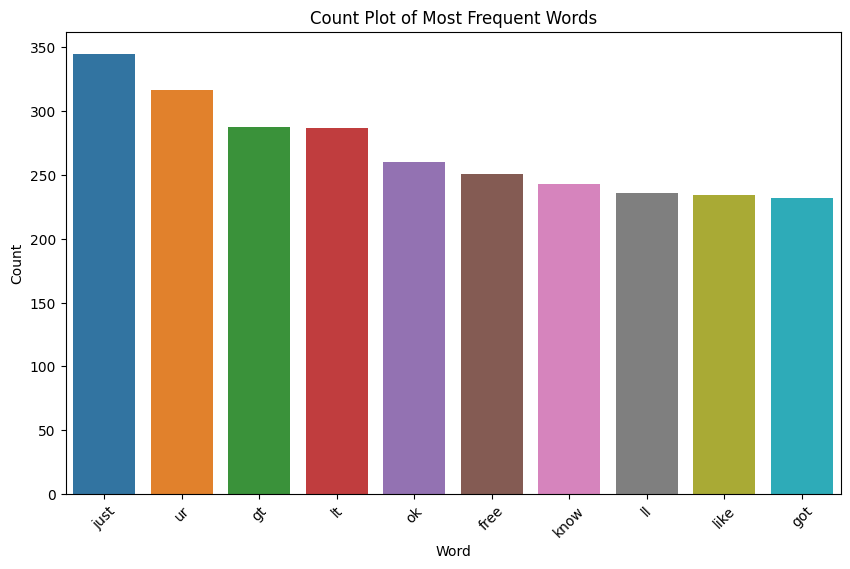

In [123]:
# Bar/Count Plot
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the email text
vectorizer = CountVectorizer(stop_words='english')
email_vector = vectorizer.fit_transform(data['Email Text'])

# Calculate word frequencies
word_freq = pd.DataFrame(email_vector.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Plot count plot of most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.index[:10], y=word_freq.values[:10])
plt.title('Count Plot of Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\stech\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


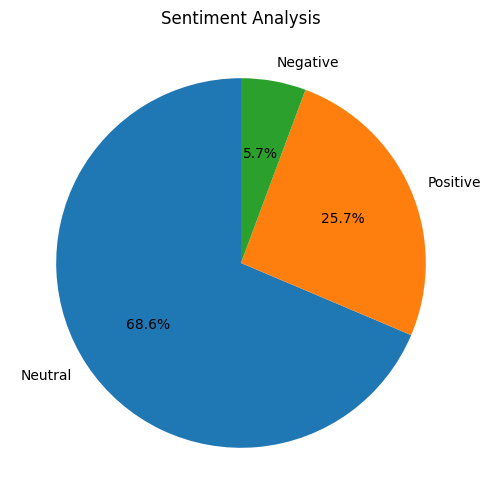

In [124]:
# Pie Chart

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required resources
nltk.download('vader_lexicon')

# Perform sentiment analysis on email text
sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Email Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiments and plot the pie chart
data['Sentiment Category'] = pd.cut(data['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

# Plot pie chart of sentiment categories
plt.figure(figsize=(8, 6))
data['Sentiment Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis')
plt.ylabel('')
plt.show()

In [125]:
# Step 6: Text Preprocessing (Example: Removing punctuation)
data['Email Text'] = data['Email Text'].str.replace('[^\w\s]', '')

C:\Users\stech\AppData\Local\Temp\ipykernel_23028\4158312546.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Email Text'] = data['Email Text'].str.replace('[^\w\s]', '')


In [126]:
# Print a sample of the preprocessed email texts
print("\nSample Preprocessed Email Texts:")
data['Email Text'].head()


Sample Preprocessed Email Texts:


0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in 2 a wkly comp to win FA Cup fina...
3          U dun say so early hor U c already then say
4    Nah I dont think he goes to usf he lives aroun...
Name: Email Text, dtype: object

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Email Text'], data['Spam/Ham'], test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer and TfidfTransformer
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Naive Bayes Classifier

In [128]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, nb_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, nb_predictions, pos_label='spam'))

Naive Bayes Classifier:
Accuracy: 0.9468085106382979
Precision: 1.0
Recall: 0.6206896551724138
F1-Score: 0.7659574468085107


## Predicting Mail Either Spam/Ham Based On Its Email Text Using Naive Bayes

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

def preprocess_email(email_text):
    return email_text

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', MultinomialNB()) 
])

pipeline.fit(X_train, y_train_encoded)

new_email_text = "This is a random mail to check if it is spam or not"
processed_email_text = preprocess_email([new_email_text])

prediction_encoded = pipeline.predict(processed_email_text)

prediction = label_encoder.inverse_transform(prediction_encoded)

# prediction
print("Prediction:", prediction)

Prediction: ['ham']


# Support Vector Machine (SVM)

In [130]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, svm_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, svm_predictions, pos_label='spam'))


Support Vector Machine (SVM):
Accuracy: 0.9796905222437138
Precision: 0.9920634920634921
Recall: 0.8620689655172413
F1-Score: 0.9225092250922509


# Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, rf_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, rf_predictions, pos_label='spam'))


Random Forest Classifier:
Accuracy: 0.9690522243713733
Precision: 0.991304347826087
Recall: 0.7862068965517242
F1-Score: 0.876923076923077


# Kaggle Link to dataset:

- https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification